In [67]:
import pandas as pd


In [68]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [69]:
dataFrame.head()  ## head başlık gibi ilk 5i getiriyor

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [129]:
import seaborn as sbn
import matplotlib.pyplot as plt


In [132]:
graph1=sbn.pairplot(dataFrame)

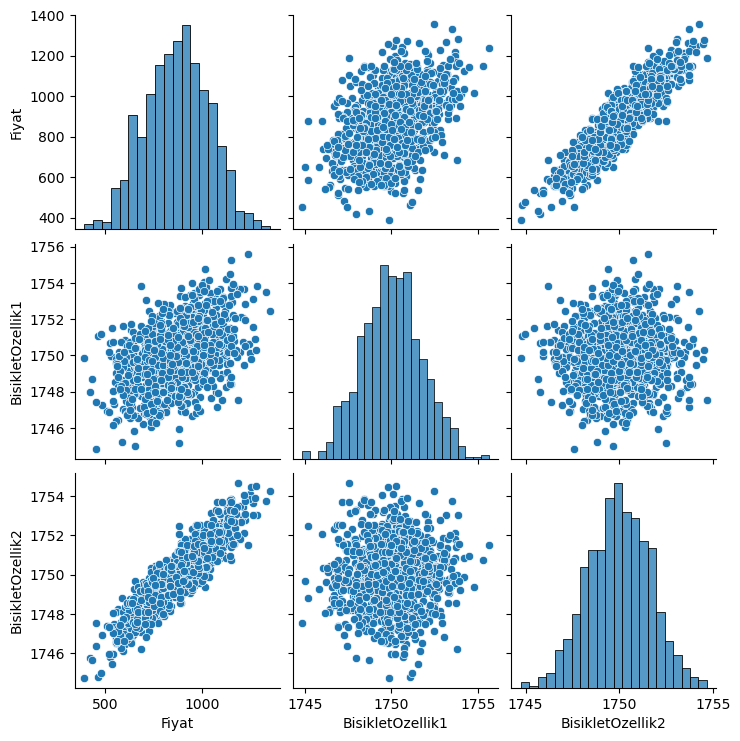

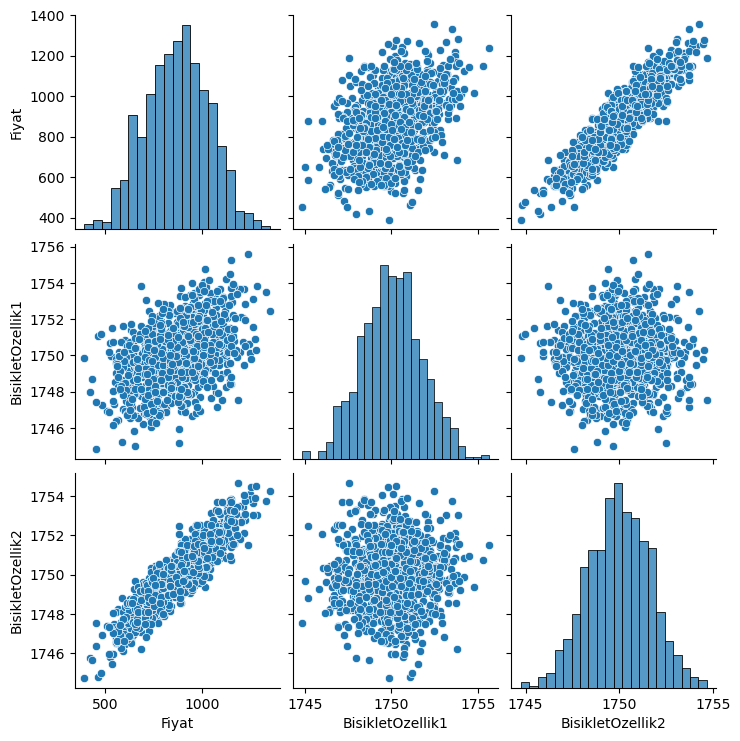

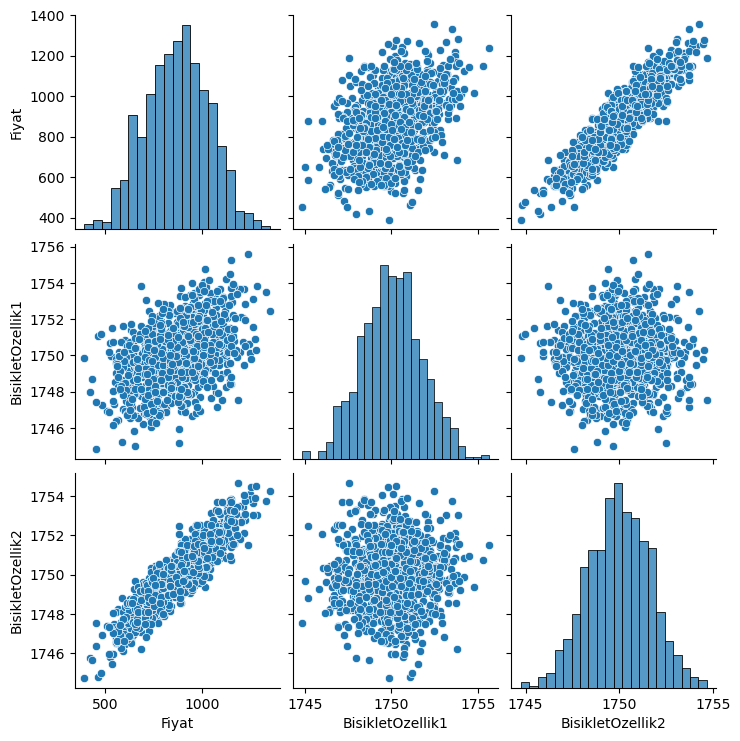

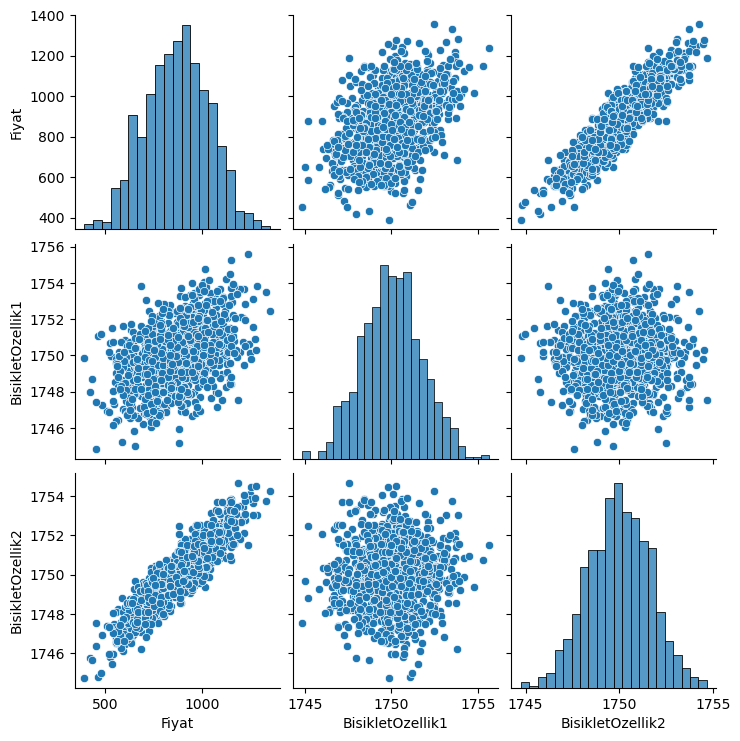

In [133]:
plt.show(graph1)

## veriyi test/train olarak ikiye ayırma



In [72]:
from sklearn.model_selection import train_test_split

In [73]:
#train_test_split

In [74]:
dataFrame

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [75]:

## y = wx+b

## y == price
y = dataFrame["Fiyat"].values ## numpy dizisine çevirir


## x == feature(özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.33,random_state= 15)

# o.33 yüzde 33 verinin kullanılsın 


In [76]:
x_train.shape

(670, 2)

In [77]:
x_test.shape

(330, 2)

In [78]:
y_train


array([ 928.6952754, 1263.961903 ,  539.3910047,  909.0602356,
        827.5599926,  755.0897782,  871.0148095,  987.1951914,
       1072.273843 ,  694.625345 ,  750.4756224,  705.8022573,
        937.9704699,  699.7664082,  836.6511441,  957.4757753,
        692.5542986,  879.9817511, 1083.133861 ,  961.2584546,
        799.7283271,  890.4446699, 1043.475329 ,  581.3983762,
        921.2831591,  904.7251741,  749.7572009,  871.8325006,
        965.3876743, 1055.197693 , 1042.743866 ,  766.9644604,
       1129.98977  ,  775.1337641,  889.7252105,  704.0185578,
        937.2014327,  601.5369815, 1068.018878 ,  864.2491913,
        845.4859474, 1028.047418 ,  659.9882841,  812.2027726,
       1116.252739 ,  862.5282243,  888.309265 ,  781.6579817,
        988.8845581,  908.5516566,  811.7080229,  927.5018276,
        833.1474785, 1026.479661 , 1078.893552 ,  717.4170105,
        885.0577122,  836.6405309,  955.8568831, 1149.145803 ,
        806.2158674,  707.2491908, 1093.736882 ,  720.3

In [79]:
y_test.shape

(330,)

## scaling veriler 0-1 aralığına getirilir

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()

In [82]:
scaler.fit(x_train)

MinMaxScaler()

In [83]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [84]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## eğer tahminler uçuk olursa model üzerinde değişiklikler yapılır

In [86]:
model = Sequential()


model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))



model.compile(optimizer = "rmsprop",loss ="mse")

In [87]:
model.fit(x_train,y_train,epochs = 250)

Epoch 1/250
21/21 [==============================] - 1s 3ms/step - loss: 796645.7500
Epoch 2/250
21/21 [==============================] - 0s 4ms/step - loss: 796257.0000
Epoch 3/250
21/21 [==============================] - 0s 4ms/step - loss: 795848.8125
Epoch 4/250
21/21 [==============================] - 0s 3ms/step - loss: 795513.1250
Epoch 5/250
21/21 [==============================] - 0s 4ms/step - loss: 795274.6875
Epoch 6/250
21/21 [==============================] - 0s 4ms/step - loss: 795057.8750
Epoch 7/250
21/21 [==============================] - 0s 3ms/step - loss: 794837.6250
Epoch 8/250
21/21 [==============================] - 0s 3ms/step - loss: 794606.2500
Epoch 9/250
21/21 [==============================] - 0s 3ms/step - loss: 794355.1250
Epoch 10/250
21/21 [==============================] - 0s 3ms/step - loss: 794072.3750
Epoch 11/250
21/21 [==============================] - 0s 3ms/step - loss: 793756.3125
Epoch 12/250
21/21 [==============================] - 0s 5ms/st

21/21 [==============================] - 0s 3ms/step - loss: 274487.3750
Epoch 97/250
21/21 [==============================] - 0s 3ms/step - loss: 260879.7188
Epoch 98/250
21/21 [==============================] - 0s 3ms/step - loss: 247271.7344
Epoch 99/250
21/21 [==============================] - 0s 3ms/step - loss: 233737.7969
Epoch 100/250
21/21 [==============================] - 0s 3ms/step - loss: 220071.0469
Epoch 101/250
21/21 [==============================] - 0s 3ms/step - loss: 206599.8750
Epoch 102/250
21/21 [==============================] - 0s 3ms/step - loss: 193291.1094
Epoch 103/250
21/21 [==============================] - 0s 3ms/step - loss: 180101.2344
Epoch 104/250
21/21 [==============================] - 0s 4ms/step - loss: 167079.0625
Epoch 105/250
21/21 [==============================] - 0s 4ms/step - loss: 154272.2812
Epoch 106/250
21/21 [==============================] - 0s 3ms/step - loss: 141746.1875
Epoch 107/250
21/21 [==============================] - 0s 3m

21/21 [==============================] - 0s 3ms/step - loss: 1064.5740
Epoch 193/250
21/21 [==============================] - 0s 4ms/step - loss: 1036.9116
Epoch 194/250
21/21 [==============================] - 0s 4ms/step - loss: 999.2744
Epoch 195/250
21/21 [==============================] - 0s 4ms/step - loss: 968.0283
Epoch 196/250
21/21 [==============================] - 0s 4ms/step - loss: 935.8957
Epoch 197/250
21/21 [==============================] - 0s 4ms/step - loss: 902.0009
Epoch 198/250
21/21 [==============================] - 0s 4ms/step - loss: 872.8999
Epoch 199/250
21/21 [==============================] - 0s 3ms/step - loss: 836.9858
Epoch 200/250
21/21 [==============================] - 0s 4ms/step - loss: 812.2479
Epoch 201/250
21/21 [==============================] - 0s 4ms/step - loss: 783.9481
Epoch 202/250
21/21 [==============================] - 0s 3ms/step - loss: 751.4530
Epoch 203/250
21/21 [==============================] - 0s 3ms/step - loss: 724.2535
Epoc

In [88]:
loss = model.history.history["loss"]


In [89]:
loss

[796645.75,
 796257.0,
 795848.8125,
 795513.125,
 795274.6875,
 795057.875,
 794837.625,
 794606.25,
 794355.125,
 794072.375,
 793756.3125,
 793404.9375,
 793016.375,
 792582.75,
 792107.625,
 791586.0625,
 791015.0,
 790386.8125,
 789707.0625,
 788962.3125,
 788162.3125,
 787288.25,
 786342.8125,
 785322.8125,
 784230.8125,
 783049.4375,
 781781.375,
 780431.125,
 778976.125,
 777426.5,
 775778.625,
 774013.875,
 772143.0625,
 770148.6875,
 768038.1875,
 765796.625,
 763427.3125,
 760927.9375,
 758285.5625,
 755505.125,
 752575.25,
 749472.8125,
 746229.4375,
 742817.75,
 739251.75,
 735519.3125,
 731583.75,
 727482.375,
 723183.0625,
 718705.3125,
 714039.25,
 709174.5625,
 704102.0,
 698808.8125,
 693315.4375,
 687606.375,
 681642.625,
 675520.0625,
 669131.625,
 662531.5625,
 655697.75,
 648665.1875,
 641357.6875,
 633831.25,
 626042.625,
 618023.875,
 609748.75,
 601215.9375,
 592413.25,
 583382.875,
 574160.125,
 564709.5,
 554957.25,
 544997.3125,
 534764.4375,
 524292.0625,
 

In [126]:
subb = sbn.lineplot(x=range(len(loss)),y=loss)

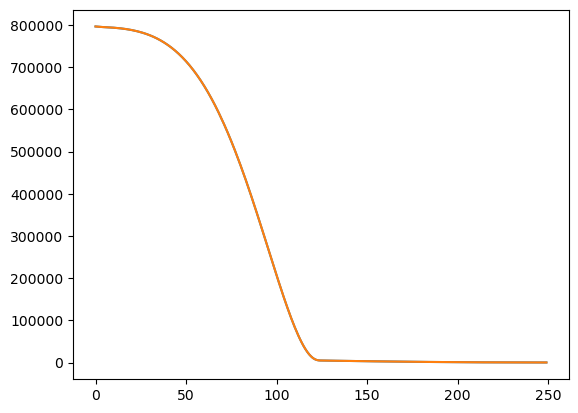

In [127]:
plt.show(subb)

In [92]:
model.evaluate(x_train, y_train)

21/21 [==============================] - 0s 3ms/step - loss: 91.7941


91.79405975341797

In [93]:
trainScore = model.evaluate(x_train, y_train, verbose =0)  # verbose ayrıntılı olur

In [94]:
trainScore

91.79405975341797

In [95]:
testLoss = model.evaluate(x_test, y_test , verbose = 0)

In [96]:
testLoss

84.47614288330078

In [97]:
testTahminleri = model.predict(x_test)


11/11 [==============================] - 0s 3ms/step


In [98]:
tahminDf = pd.DataFrame(y_test, columns= ["Gercek Y"])

In [99]:
tahminDf

,Gercek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [100]:
testTahminleri = pd.Series(testTahminleri.reshape(330))

In [101]:
testTahminleri

0      1076.540283
1       630.463684
2       878.094543
3       898.059204
4       903.584778
          ...     
325    1013.055420
326     796.058411
327     769.672485
328    1164.140503
329     808.448547
Length: 330, dtype: float32

In [102]:
tahminDf = pd.concat([tahminDf,testTahminleri], axis = 1)

In [103]:
tahminDf

,Gercek Y,0
0,1081.652164,1076.540283
1,622.675990,630.463684
2,889.356810,878.094543
3,902.826733,898.059204
4,897.662404,903.584778
...,...,...
325,1028.438035,1013.055420
326,789.934950,796.058411
327,758.490486,769.672485
328,1172.871659,1164.140503


In [104]:
tahminDf.columns = (["Gercek Y","Tahmin Y"])

In [105]:
tahminDf

,Gercek Y,Tahmin Y
0,1081.652164,1076.540283
1,622.675990,630.463684
2,889.356810,878.094543
3,902.826733,898.059204
4,897.662404,903.584778
...,...,...
325,1028.438035,1013.055420
326,789.934950,796.058411
327,758.490486,769.672485
328,1172.871659,1164.140503


In [106]:
subb2=sbn.scatterplot(x = "Gercek Y", y = "Tahmin Y",data = tahminDf)

## eğer grafik bu tarzsa başarılı

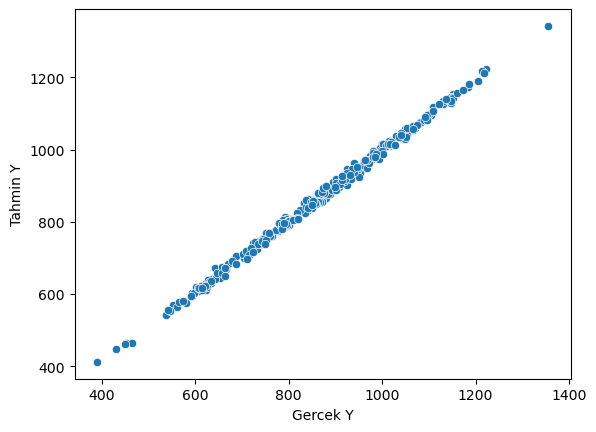

In [107]:
plt.show(subb2)

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [109]:
mean_absolute_error(tahminDf["Gercek Y"],tahminDf["Tahmin Y"])   # hata oranı

7.271135747147253

In [110]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [111]:
mean_squared_error(tahminDf["Gercek Y"],tahminDf["Tahmin Y"])

84.47612698199707

In [120]:
yeniBisikletOzellikleri = [[1750,1749]]

In [121]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [122]:
model.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 24ms/step


array([[789.75446]], dtype=float32)

## model kaydetme ve model ekleme

In [123]:
from tensorflow.keras.models import load_model

In [124]:
model.save("bisiklet_modeli.h5")  ## kaydedilen dosyalarda olur

In [134]:
call  = load_model("bisiklet_modeli.h5")  # model çağırma

In [135]:
call.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 105ms/step


array([[789.75446]], dtype=float32)